In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("/content/drive/MyDrive/creditcard/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 소수점 두자리만 좀 잘라서 보자.
pd.set_option("display.float", "{:.2f}".format)

In [5]:
# 결측치 확인하기

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# class label 확인하기

data['Class'].value_counts()

percent = (data['Class'].value_counts()[1] / data['Class'].value_counts()[0]) * 100
print(percent)



0.17304750013189596


Text(0, 0.5, 'Frequency')

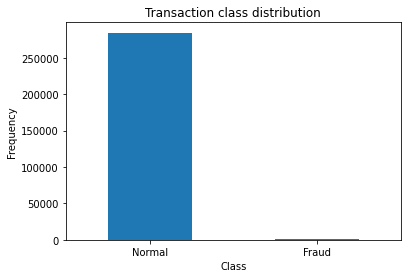

In [7]:
LABELS = ["Normal","Fraud"]

count_classes = pd.value_counts(data['Class'], sort= True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

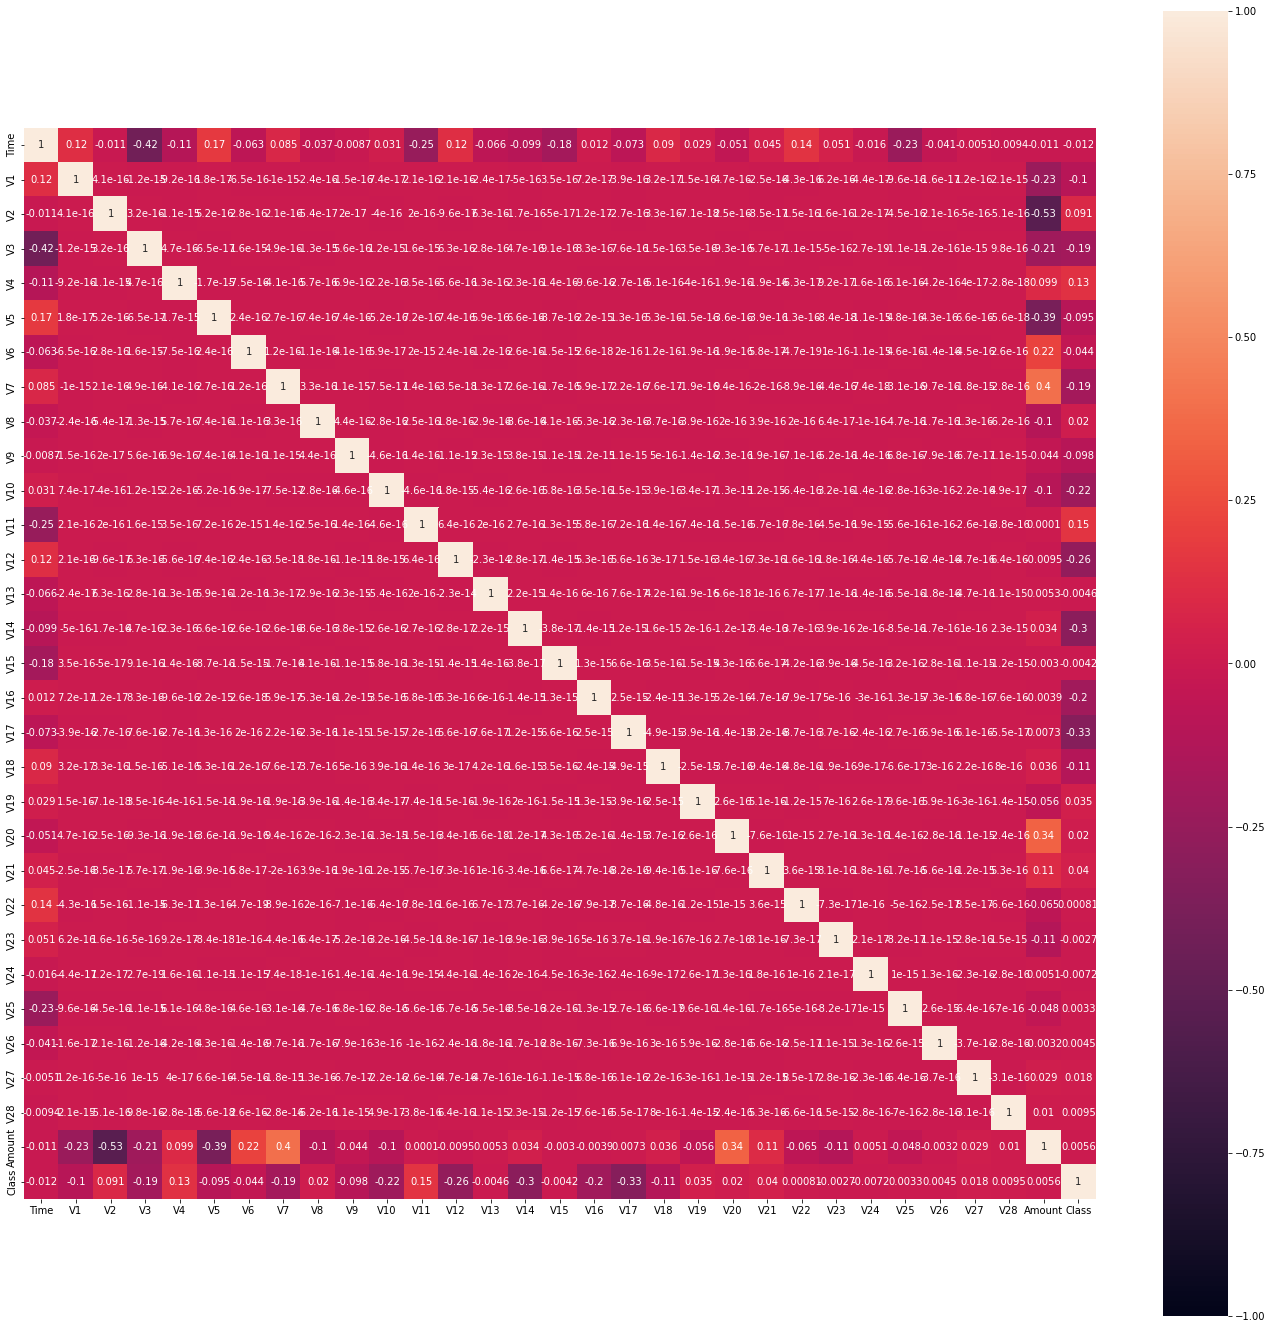

In [8]:
corr = data.corr()
fig = plt.figure(figsize = (24,24))

sns.heatmap(corr, vmax=1, square = True, annot = True, vmin=-1)
plt.show()

In [9]:
# 눈 여겨 볼 만한 correlations 은 
# Time & V3 (-0.42), Amount & V2 (-0.53), Amount & V4 (0.4)

In [10]:
# seaborn scheme 로 세팅하고 font_scale 세팅.
plt.style.use('seaborn')
sns.set(font_scale=2.5) 

In [11]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 브라우저에서 결과 바로 볼 수 있게 해줌.
%matplotlib inline

In [12]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f'shape of fraud : {fraud.shape}')
print(f'shape of non-fraud : {normal.shape}')



shape of fraud : (492, 31)
shape of non-fraud : (284315, 31)


In [13]:
# fraud 와 normal 의 'Amount'를 비교해보자 한다.

pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


- fraud transaction 의 amount가 좀 더 높다.

In [14]:
# fraud 와 normal 의 'Time'을 비교해보자 한다
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


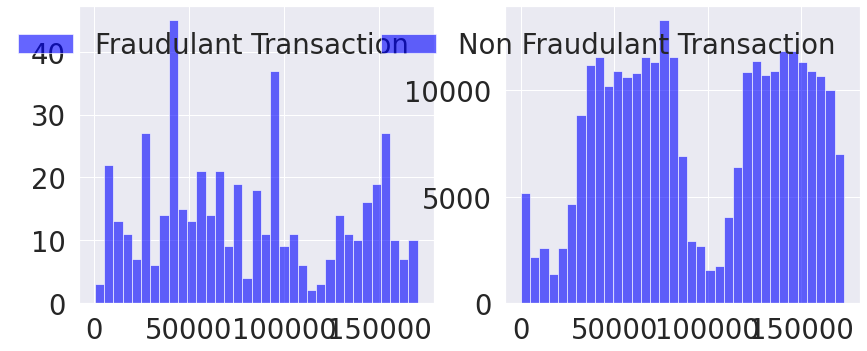

In [15]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

## 전처리

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class',axis=1)
y = data.Class

# 먼저 validation과 test 데이터로 나눈다.

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,test_size=0.3, random_state=42)


# 그 다음 validation data 에서 train 데이터를 나눈다.

X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42)

# scaler를 한다.
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

# label도 나누어서 변수에 저장한다.
w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraud transaction 비율: {w_n}")
print(f"Non-Fraud transaction 비율: {w_p}")

Fraud transaction 비율: 0.0017994745785028623
Non-Fraud transaction 비율: 0.9982005254214972


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## 모델링

In [18]:
# ANN 모델

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [19]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 9s 83ms/step - loss: 0.8120 - fn: 61.0000 - fp: 72600.0000 - tn: 86604.0000 - tp: 226.0000 - precision: 0.0031 - recall: 0.7875 - val_loss: 0.5346 - val_fn: 13.0000 - val_fp: 277.0000 - val_tn: 39527.0000 - val_tp: 56.0000 - val_precision: 0.1682 - val_recall: 0.8116
Epoch 2/300
78/78 [==============================] - 6s 73ms/step - loss: 0.6891 - fn: 39.0000 - fp: 60607.0000 - tn: 98597.0000 - tp: 248.0000 - precision: 0.0041 - recall: 0.8641 - val_loss: 0.4561 - val_fn: 12.0000 - val_fp: 178.0000 - val_tn: 39626.0000 - val_tp: 57.0000 - val_precision: 0.2426 - val_recall: 0.8261
Epoch 3/300
78/78 [==============================] - 6s 74ms/step - loss: 0.6112 - fn: 47.0000 - fp: 47827.0000 - tn: 111377.0000 - tp: 240.0000 - precision: 0.0050 - recall: 0.8362 - val_loss: 0.4149 - val_fn: 13.0000 - val_fp: 98.0000 - val_tn: 39706.0000 - val_tp: 56.0000 - val_precision: 0.3636 - val_recall: 0.8116
Epoch 4/300
78/78 [==================

In [20]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0040 - fn: 26.0000 - fp: 8.0000 - tn: 85299.0000 - tp: 110.0000 - precision: 0.9322 - recall: 0.8088
[0.0040388028137385845, 26.0, 8.0, 85299.0, 110.0, 0.9322034120559692, 0.8088235259056091]


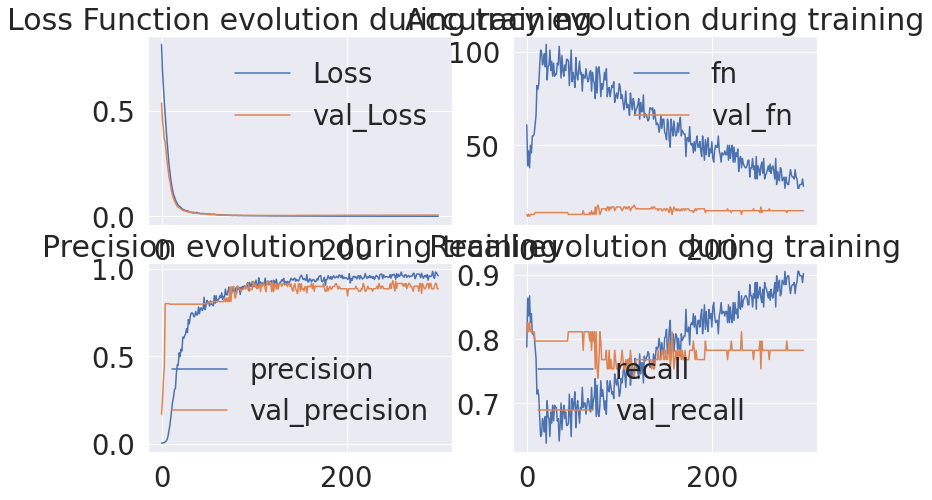

In [21]:
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4,2,2)
plt.plot(r.history['fn'],label='fn')
plt.plot(r.history['val_fn'],label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4,2,3)
plt.plot(r.history['precision'],label='precision')
plt.plot(r.history['val_precision'],label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4,2,4)
plt.plot(r.history['recall'],label='recall')
plt.plot(r.history['val_recall'],label='val_recall')
plt.title('Recall evolution during training')
plt.legend()


In [22]:
# 모델 예측
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print_score(y_train,y_train_pred.round(), train=True)
print_score(y_test,y_test_pred.round(),train=False)

# score를 모아두는 dictionary 만들기
scores_dict = {
    'ANNs' : {
        'Train' : f1_score(y_train,y_train_pred.round()),
        'Test' : f1_score(y_test,y_test_pred.round()),
    },
}

2671/2671 [==============================] - 5s 2ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.93      1.00       0.97          1.00
f1-score       1.00   0.96      1.00       0.98          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159203      1]
 [    20    267]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.87      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_________

## XGBoost

In [24]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train,eval_metric='aucpr')

y_train_pred= xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train,y_train_pred, train=True)
print_score(y_test,y_test_pred, train=False)

# xgboost도 dictionary에 추가해주기.
scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.98      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.91      1.00       0.95          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

## CatBoost

In [26]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)



Learning rate set to 0.089847
0:	learn: 0.3915001	total: 99.1ms	remaining: 1m 38s
1:	learn: 0.2368380	total: 147ms	remaining: 1m 13s
2:	learn: 0.1341782	total: 209ms	remaining: 1m 9s
3:	learn: 0.0788507	total: 252ms	remaining: 1m 2s
4:	learn: 0.0482949	total: 295ms	remaining: 58.6s
5:	learn: 0.0315326	total: 336ms	remaining: 55.7s
6:	learn: 0.0213628	total: 382ms	remaining: 54.1s
7:	learn: 0.0153604	total: 442ms	remaining: 54.8s
8:	learn: 0.0115137	total: 486ms	remaining: 53.5s
9:	learn: 0.0090128	total: 539ms	remaining: 53.4s
10:	learn: 0.0071549	total: 590ms	remaining: 53s
11:	learn: 0.0060639	total: 636ms	remaining: 52.3s
12:	learn: 0.0052454	total: 685ms	remaining: 52s
13:	learn: 0.0046540	total: 735ms	remaining: 51.8s
14:	learn: 0.0042228	total: 791ms	remaining: 52s
15:	learn: 0.0038779	total: 838ms	remaining: 51.5s
16:	learn: 0.0036112	total: 881ms	remaining: 51s
17:	learn: 0.0034151	total: 933ms	remaining: 50.9s
18:	learn: 0.0032510	total: 975ms	remaining: 50.3s
19:	learn: 0.003

In [28]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

## LigthGBM


In [29]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.86%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.59      1.00       0.80          1.00
recall         1.00   0.69      1.00       0.84          1.00
f1-score       1.00   0.64      1.00       0.82          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159068    136]
 [    89    198]]

Test Result:
Accuracy Score: 99.75%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.35      1.00       0.67          1.00
recall        1.00   0.66      1.00       0.83          1.00
f1-score      1.00   0.46      1.00       0.73          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

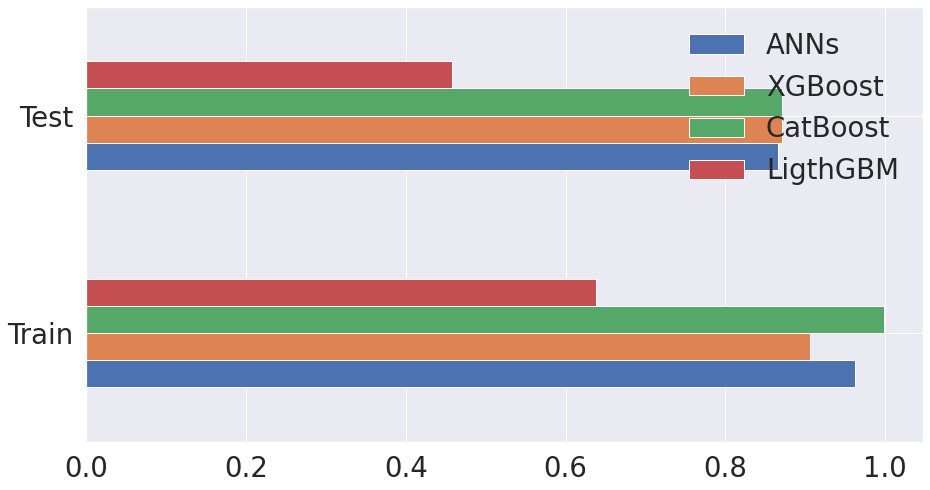

In [30]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))